# Introduction 

I will be looking at the Heart Disease UCI dataset. The end goal is to build a model to predict heart disease in patients.
Context
This database contains 76 attributes, but all published experiments refer to using a subset of 14 of them. In particular, the Cleveland database is the only one that has been used by ML researchers to this date. The "goal" field refers to the presence of heart disease in the patient. It is integer valued from 0 (no presence) to 1.

Content

Attribute Information: 
> 1. age 
> 2. sex 
> 3. chest pain type (4 values) 
> 4. resting blood pressure 
> 5. serum cholestoral in mg/dl 
> 6. fasting blood sugar > 120 mg/dl
> 7. resting electrocardiographic results (values 0,1,2)
> 8. maximum heart rate achieved 
> 9. exercise induced angina 
> 10. oldpeak = ST depression induced by exercise relative to rest 
> 11. the slope of the peak exercise ST segment 
> 12. number of major vessels (0-3) colored by flourosopy 
> 13. thal: 3 = normal; 6 = fixed defect; 7 = reversable defect
> 14. target: 0 = no heart disease found in patient; 1 = presence of heart disease identified

# Loading in the Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 

import os 
print(os.listdir('../input'))

['heart.csv']


In [2]:
df = pd.read_csv('../input/heart.csv')

# Understand the structure of Data

Let's observe the shape and structure of the UCI Health Data. We want to see what data types columns are and how many null values there are (if there are any). 

In [3]:
df.shape

(303, 14)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
age         303 non-null int64
sex         303 non-null int64
cp          303 non-null int64
trestbps    303 non-null int64
chol        303 non-null int64
fbs         303 non-null int64
restecg     303 non-null int64
thalach     303 non-null int64
exang       303 non-null int64
oldpeak     303 non-null float64
slope       303 non-null int64
ca          303 non-null int64
thal        303 non-null int64
target      303 non-null int64
dtypes: float64(1), int64(13)
memory usage: 33.2 KB


In [5]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [6]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [7]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [8]:
df.groupby(['sex']).mean().head()

,age,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
sex,,,,,,,,,,,,,
0,55.677083,1.041667,133.083333,261.302083,0.12500,0.572917,151.125000,0.229167,0.876042,1.427083,0.552083,2.125000,0.750000
1,53.758454,0.932367,130.946860,239.289855,0.15942,0.507246,148.961353,0.371981,1.115459,1.386473,0.811594,2.400966,0.449275


This chart provides good information as we can see the differences between both genders. Taking a look at the target outcome, we can see that women, on average, appear to be at greater risk of having the presence of heart disease at 75%, while men tend to, on average, have a 45% chance of having heart disease. In the next section, I will look at this more in-depth.

In [9]:
df.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.098447,-0.068653,0.279351,0.213678,0.121308,-0.116211,-0.398522,0.096801,0.210013,-0.168814,0.276326,0.068001,-0.225439
sex,-0.098447,1.000000,-0.049353,-0.056769,-0.197912,0.045032,-0.058196,-0.044020,0.141664,0.096093,-0.030711,0.118261,0.210041,-0.280937
cp,-0.068653,-0.049353,1.000000,0.047608,-0.076904,0.094444,0.044421,0.295762,-0.394280,-0.149230,0.119717,-0.181053,-0.161736,0.433798
trestbps,0.279351,-0.056769,0.047608,1.000000,0.123174,0.177531,-0.114103,-0.046698,0.067616,0.193216,-0.121475,0.101389,0.062210,-0.144931
chol,0.213678,-0.197912,-0.076904,0.123174,1.000000,0.013294,-0.151040,-0.009940,0.067023,0.053952,-0.004038,0.070511,0.098803,-0.085239
fbs,0.121308,0.045032,0.094444,0.177531,0.013294,1.000000,-0.084189,-0.008567,0.025665,0.005747,-0.059894,0.137979,-0.032019,-0.028046
restecg,-0.116211,-0.058196,0.044421,-0.114103,-0.151040,-0.084189,1.000000,0.044123,-0.070733,-0.058770,0.093045,-0.072042,-0.011981,0.137230
thalach,-0.398522,-0.044020,0.295762,-0.046698,-0.009940,-0.008567,0.044123,1.000000,-0.378812,-0.344187,0.386784,-0.213177,-0.096439,0.421741
exang,0.096801,0.141664,-0.394280,0.067616,0.067023,0.025665,-0.070733,-0.378812,1.000000,0.288223,-0.257748,0.115739,0.206754,-0.436757
oldpeak,0.210013,0.096093,-0.149230,0.193216,0.053952,0.005747,-0.058770,-0.344187,0.288223,1.000000,-0.577537,0.222682,0.210244,-0.430696


Looking at the correlations it is difficult to see relationships. Let's begin to make some visualizations to better understand the data. 

# Understanding Data with Visualizations

Before checking the correlation among the variables. Let's look at how the data is distributed across the different columns.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001F9F096AF60>,
      dtype=object)

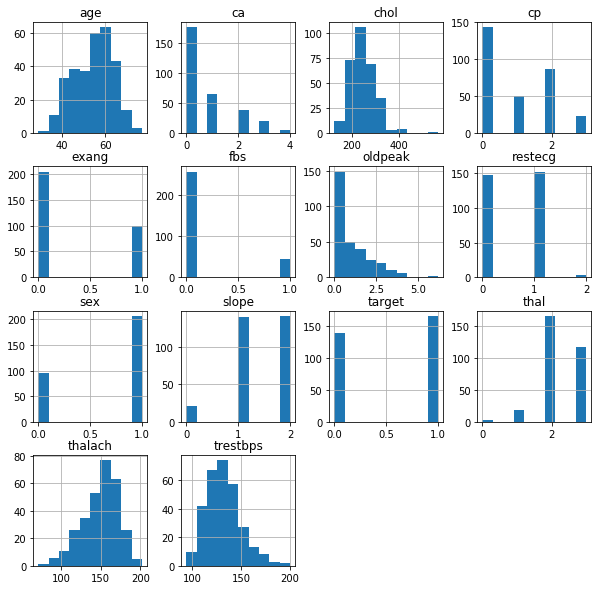

In [10]:
df.hist(figsize = (10,10))


Text(0.5, 1.0, 'Correlation Chart')

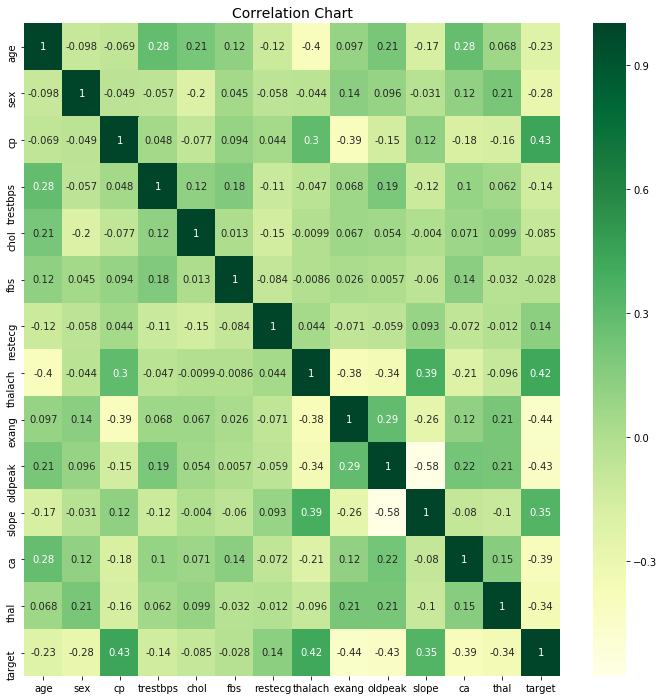

In [11]:
corr = df.corr()
plt.figure(figsize = (12,12))
sns.heatmap(corr, annot = True, cmap = 'YlGn')
plt.title('Correlation Chart', size = 14)

This correlation helps us better understand the relationship between variables in this dataset. Some correlations better help highlight the data.

    Positive correlations:
        Chest Pain(cp) and Target
        Thalach(max heart rate) and Target
        Slope and Thal
        Slope and Target

    Negative correlations: 
        Thalach and age
        Target and exang
        Target and oldpeak 
        Target and thal
        Target and Ca(number of major vessels)
        
The major relationships I will look into will be thalach, Cp, slope, and Ca in relation to a patient having heart disease. 

In [12]:
thalch_df = pd.crosstab(df['thalach'],df['target'])

In [13]:
thalch_df.head()

target,0,1
thalach,,
71,1,0
88,1,0
90,1,0
95,1,0
96,1,1


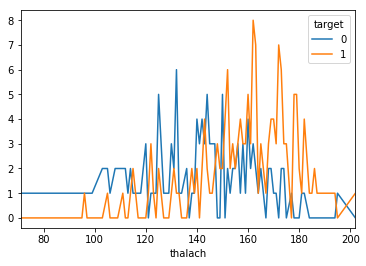

In [14]:
thalch_df.plot()

This chart shows us the changes in maxium heartrate for patients with and without heart disease. From the graph, we can examine that there is more variation in the max heart rate of patients who are at risk of heart disease than those who do not.

In [15]:
cp_df = pd.crosstab(df['cp'],df['target'])

In [16]:
cp_df

target,0,1
cp,,
0,104,39
1,9,41
2,18,69
3,7,16


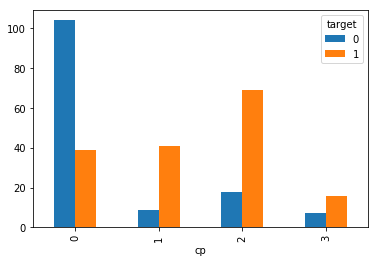

In [17]:
cp_df.plot(kind = "bar")

We need to use a bar graph to illustrate the ordinal variable cp. This graph shows patients with chest pain are more likely to develop heart disease.

In [18]:
slope_df = pd.crosstab(df['slope'], df['target'])

In [19]:
slope_df

target,0,1
slope,,
0,12,9
1,91,49
2,35,107


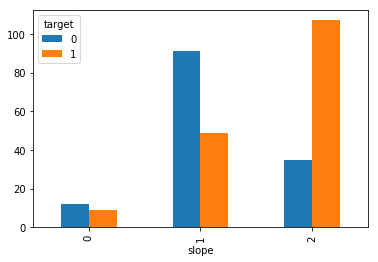

In [20]:
slope_df.plot(kind = "bar")

Slope is another ordinal variable. As the level of slope increases, a patient seems to be more likely to develop heart disease. Slope level 2 proves to be a much greater risk of heart disease than level 0 for patients.

In [21]:
ca_df = pd.crosstab(df['ca'], df['target'])

In [22]:
ca_df

target,0,1
ca,,
0,45,130
1,44,21
2,31,7
3,17,3
4,1,4


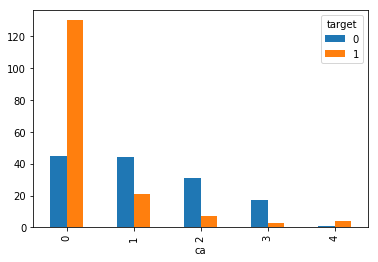

In [23]:
ca_df.plot(kind = "bar")

This bar chart illustrates relationship between the number of major vessels a patient has and there chance of heart disease. It is a negative relationship which is made clear if we look at how a patient with 0 major vessels has a greater chance of contracting a heart disease than someone with 3 vessels. 4 vessels may be overcomensating for the patient or there is not enough points to illustrate the decline of heart disease. 

# Further Analysis of Data

This is supplemental information to provide more insight into the dataset such as the age range of patients and to visualize old information like which gender is more likely to contract heart disease.

In [24]:
age_df = pd.crosstab(df['age'], df['target'])

In [25]:
age_df.head()

target,0,1
age,,
29,0,1
34,0,2
35,2,2
37,0,2
38,1,2


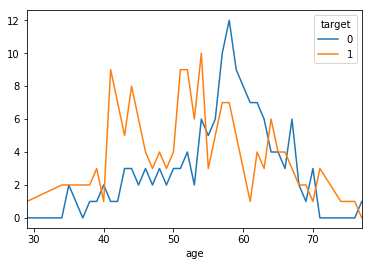

In [26]:
age_df.plot()

This chart illustrates that any person can contract a form of heart disease and that it can happen at really any age. There is no signficance in the relationship between age and target. It is just an interesting concept that age has no barring on when heart disease can strike.

In [27]:
sex_df = pd.crosstab(df['sex'], df['target'])

In [28]:
sex_df

target,0,1
sex,,
0,24,72
1,114,93


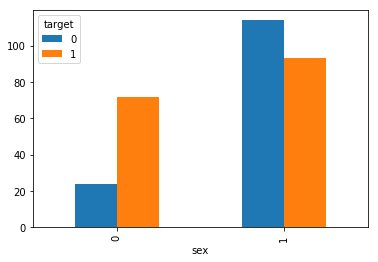

In [29]:
sex_df.plot(kind = "bar")

The graph illustrates, what we discovered in the first look at the data, that women have a greater chance of contracting heart disease than men. Women have a 75% chance of contracting heart disease while men have about a 45% chance of heart disease.

'# Preparation for ML

In [30]:
array = df.values
x = array[:, 0:13]
y = array[:, 13]

Appropriately divide the data with the independent variables being assigned to x, and the dependent or target variable is assigned to y. 

In [31]:
from sklearn.model_selection import train_test_split
testsize = 0.2
seed = 7
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=testsize, random_state=seed)

The data needs to be split to run a prediciton model for it. We split it assigning 80% of the data values to train the model and the other 20% to test predictions. 

In [32]:
from sklearn.preprocessing import StandardScaler

scale = StandardScaler()
x_train_scale = scale.fit_transform(x_train)
x_train = pd.DataFrame(x_train_scale)
x_test_scale =scale.fit_transform(x_test)
x_test = pd.DataFrame(x_test_scale)

Before entering this data into the model, it needs to be standardized so it will not distort the model. Now we are ready to make the model. 

# Run ML models for Prediction

I will be using Logistic Regression to build this build to predict if patients will have a greater risk of having heart disease (target = 1). Load in Logistic Regresison.

In [33]:
from sklearn.linear_model import LogisticRegression
logisticRegr = LogisticRegression(solver='lbfgs')
logisticRegr.fit(x_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='lbfgs',
          tol=0.0001, verbose=0, warm_start=False)

In [34]:
predictions = logisticRegr.predict(x_test)
score = logisticRegr.score(x_test, y_test)
print(score * 100)

77.04918032786885


The Logistic Regression Model is about 77% accurate for predictions. 

In [35]:
from sklearn import metrics
from sklearn.metrics import classification_report
print(classification_report(y_test, predictions))
cm = metrics.confusion_matrix(y_test, predictions)
print(cm)

              precision    recall  f1-score   support

         0.0       0.83      0.67      0.74        30
         1.0       0.73      0.87      0.79        31

   micro avg       0.77      0.77      0.77        61
   macro avg       0.78      0.77      0.77        61
weighted avg       0.78      0.77      0.77        61

[[20 10]
 [ 4 27]]


Precision and recall are pretty good for the model. This shows that the model is able to reliably return instances in which the patient does not have heart disease (83%) and can identify all instances where they do have heart disease fairly accurately (87%). It is difficult to understand the results of the data from this confusion matrix for the model, let's visualize it.

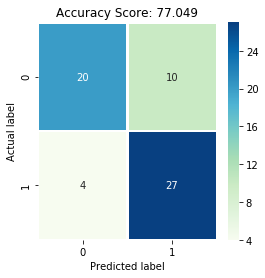

In [36]:
plt.figure(figsize = (4, 4))
sns.heatmap(cm, linewidths = 1.5, cmap = "GnBu", annot = True);
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(round(score*100, 3))
plt.title(all_sample_title, size = 12);

This is much easier to interpret our model results. Like I mentioned early about the model's precision, this diagram clearly shows 20 of the 24 variables being predicted as true for negative heart disease results (83% precision). Testing patients for the presence of heart disease is a lot more reliable at identifying positives overall, but doesn't have as much precision for predicting actual positive results (87% recall with 73% precision).

# Conclusions

With some visualizations and a logistic regression model completed, it's time to reflect on the data found in the Heart Disease UCI Dataset. Looking at the visualizations in section 4, we can see the relationship some of the significant variables have with the target variable. From max heartrate (thalch), we can observe that patients with more erratic max heart rate are at greater risk of heart disease. Patients with greater level of chest pain are at greater risk of heart disease. Slope tied to exercise and is measured by levels. With each level, the patient is at a greater risk of heart disease. The most important variable with a negative relationship with target, I believe, is the # of major vessels (ca). This variable shows that patients with more major blood vessels are less likely to develop heart disease. Some other observations I discovered were that patients at any age could contract heart disease and from this sample women have a greater risk of having heart disease (75%) than men (~45%). One thing I would hope for in a revised dataset is more variables that paints a better picture of the backgrounds of the patients. New variables might include income level, level of stress, history of heart disease, drug history, and weight. I think these variables might reveal more insights about who is at greater risk of heart disease and allow us to develop a more accurate prediction model. 